Выполните задание по [ссылке](https://www.kaggle.com/datasets/rajyellow46/wine-quality) и оформите в виде CRISP-DM подхода.

Структурируйте код, отчёт и файлы с данными на основе сегодняшней лекции.
Загрузите решение в Git и пришлите ссылку на ваш репозиторий.

Дополнительное задание

*Попробуйте не загружать CSV-файл с данными, а сделайте отдельный скрипт на его получение.

In [64]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
# from sklearn.linear_model import LogisticRegression 
# from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('../data/winequalityN.csv')
data.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


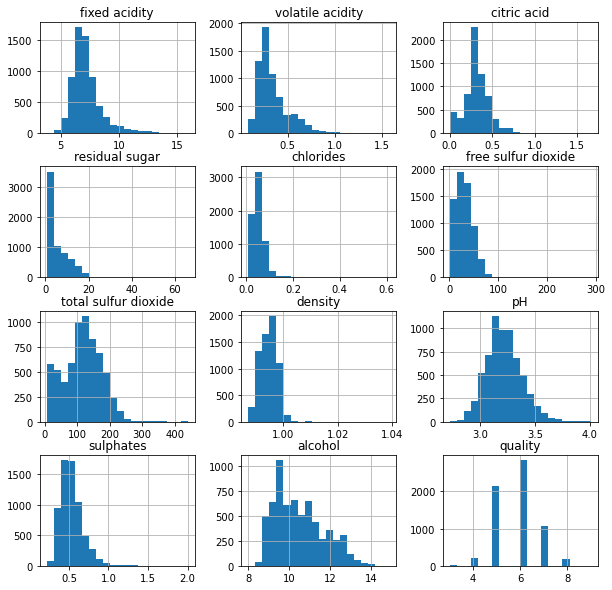

In [4]:
data.hist(bins=20, figsize=(10,10))
plt.show()

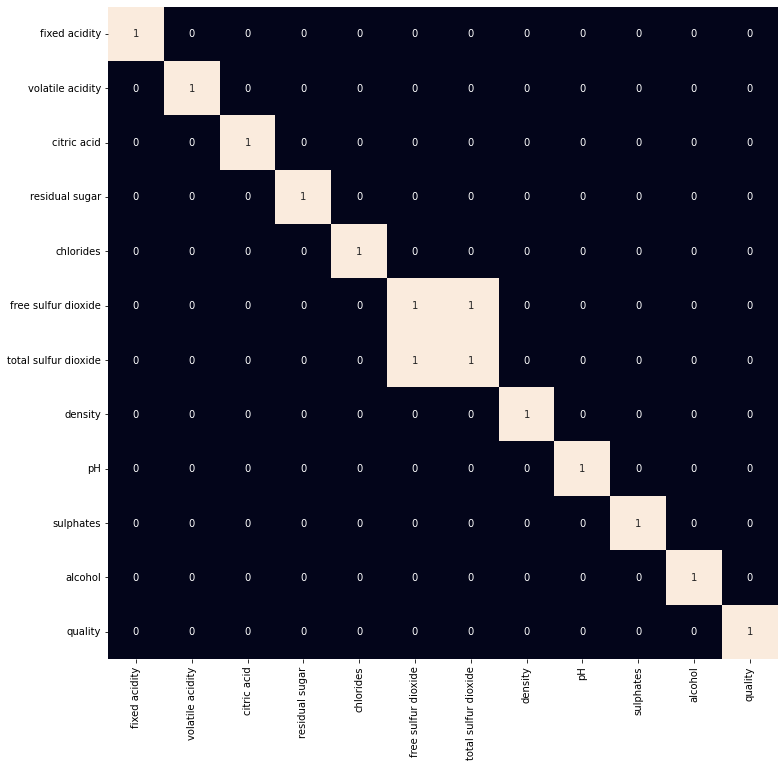

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr()>0.7, annot=True, cbar=False)
plt.show()

In [6]:
X = data.copy()
X = X.dropna()

In [5]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [6]:
# le.fit(X['type'])

In [7]:
X['type'] =  np.where(X['type'] == 'red', 0, 1)

In [13]:
y = X['quality']
# столбец quality является целевой переменной, удаляем его из Х

X = X.drop(columns=['quality', 'total sulfur dioxide'])
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(X_train)
xtest = norm.transform(X_test)

In [61]:
models = [RandomForestClassifier(max_depth=2, random_state=1234), SVC(decision_function_shape="ovo")]

for i in range(2):
    models[i].fit(xtrain, y_train)
    y_pred = models[i].predict(xtest)

    print(f'{models[i]} : ')
    print('Accuracy : ', accuracy_score(y_test, y_pred))
    print()

RandomForestClassifier(max_depth=2, random_state=1234) : 
Accuracy :  0.5127610208816705

SVC(decision_function_shape='ovo') : 
Accuracy :  0.5290023201856149



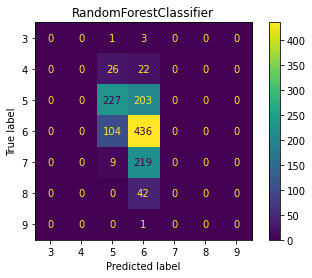

<Figure size 432x288 with 0 Axes>

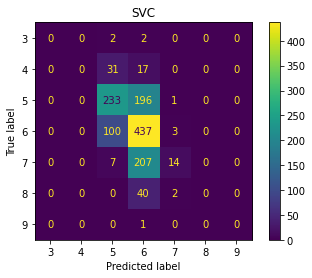

<Figure size 432x288 with 0 Axes>

In [68]:
model_names = ['RandomForestClassifier', 'SVC']
for i in range(2):
    ConfusionMatrixDisplay.from_estimator(models[i], xtest, y_test)
    plt.title(model_names[i])
    plt.show()
    plt.savefig('../results/'+model_names[i]+'.png')

In [25]:
# plt.savefig('foo.png')
# plt.savefig('foo.pdf')